In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()


In [2]:
data = pd.read_csv("Train.csv")

In [3]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


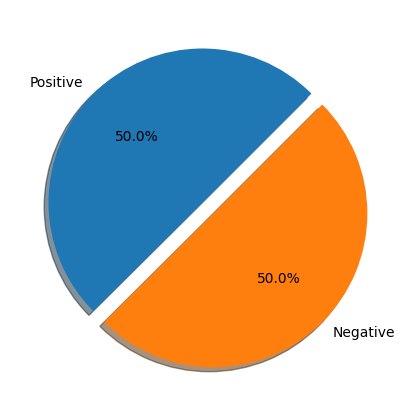

In [7]:
fig = plt.figure(figsize=(5,5))
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 
                 startangle = 45,
                 explode=(0, 0.1))

In [9]:
import re

def preprocessor(text):
    text = re.sub('<[^>]>', '', text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
    return text 

In [10]:
data['text']=data['text'].apply(preprocessor)

In [11]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [12]:
def tokenize(text):
    return text.split()

def tokenize_porter(text):
    return [porter.stem(word) for word in text.split()]

In [13]:
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.0 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from wordcloud import WordCloud

In [18]:
positivedata = data[data['label']==1]
positivedata = positivedata['text']

In [19]:
negdata = data[data['label'] == 0]
negdata= negdata['text']

In [20]:
negdata

0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
5        a terrible movie as everyone has said what mad...
                               ...                        
39984    i couldn t relate to this film it failed to en...
39985    comedy what s so funny about watching an ugly ...
39993     the best movie of the 90 s the welsh trainspo...
39994    my girlfriend has the habit of going to blockb...
39997    my wife and i watched this movie because we pl...
Name: text, Length: 20019, dtype: object

In [21]:
def wordcloud_draw(data, color='white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])

    wordcloud = WordCloud(stopwords=stop,
                         background_color=color,
                         width=2500,
                         height=2000).generate(cleaned_word)

    plt.figure(1, figsize=(10,7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

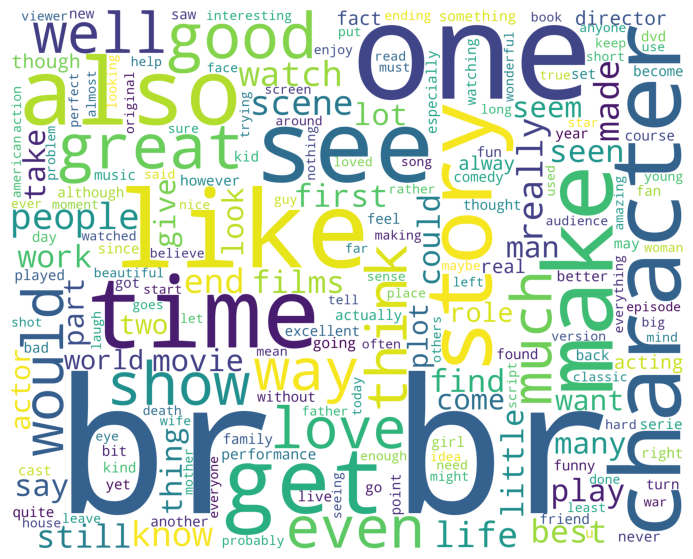

In [22]:
wordcloud_draw(positivedata, 'white')

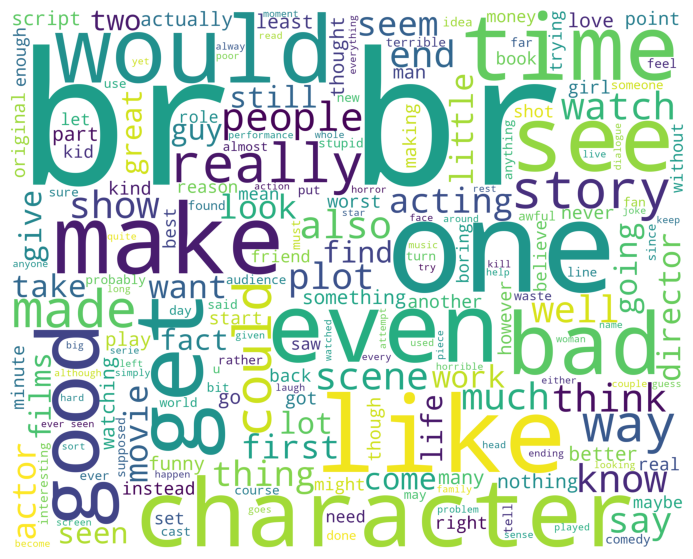

In [23]:
wordcloud_draw(negdata, 'white')

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenize_porter, use_idf=True, norm='l2', smooth_idf=True)

In [31]:
y = data.label.values

In [32]:
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [33]:
x=tfidf.fit_transform(data.text)

C:\Users\prajw\anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)


In [35]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   32.2s remaining:   32.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   32.5s finished


Accuracy: 0.89155
